# Emotion recognition

---

### **Course Information**
**Subject:** Inteligencia artificial avanzada para la ciencia de datos II (Gpo 500)
**Institution:** Tecnológico de Monterrey, Campus CCM
**Assignment:** Emotion recognition

---

### **Team Members**
- **Luis Enrique Morales Pérez** - A01656445
- **Nicole Kapellmann Lepine** - A01664563
- **Max Asiel Martínez De la Huerta** - A01657287
- **Yamilet Lozada Rangel** - A01664113
- **Gerardo Pontones Sariñana** - A01664332
- **Mauricio Aguilar Pacheco** - A01663667
- **Darío Mariscal Rocha** - A01658815



In [ ]:
import os
import cv2
import numpy as np
import kagglehub
from tensorflow.keras.utils import to_categorical

dataset_path = kagglehub.dataset_download("msambare/fer2013")
print("Ruta del dataset:", dataset_path)

def cargar_datos(base_path):
    X, y = [], []
    clases = sorted(os.listdir(base_path))
    for idx, clase in enumerate(clases):
        clase_path = os.path.join(base_path, clase)
        if not os.path.isdir(clase_path):
            continue
        for img_name in os.listdir(clase_path):
            img_path = os.path.join(clase_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (48, 48))
            X.append(img)
            y.append(idx)
    X = np.array(X, dtype="float32")
    y = np.array(y, dtype="int32")
    return X, y, clases

train_path = os.path.join(dataset_path, "train")
test_path  = os.path.join(dataset_path, "test")

x_train, y_train, clases = cargar_datos(train_path)
x_test, y_test, _ = cargar_datos(test_path)

x_train = x_train[..., np.newaxis] / 255.0
x_test  = x_test[..., np.newaxis] / 255.0

y_train = to_categorical(y_train, num_classes=len(clases))
y_test  = to_categorical(y_test, num_classes=len(clases))

print("\nTamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de prueba:", x_test.shape)
print("Clases detectadas:", clases)

Using Colab cache for faster access to the 'fer2013' dataset.
Ruta del dataset: /kaggle/input/fer2013

Tamaño del set de entrenamiento: (28709, 48, 48, 1)
Tamaño del set de prueba: (7178, 48, 48, 1)
Clases detectadas: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

num_classes = len(clases)

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),


    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),


    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,732,807 (10.42 MB)

 Trainable params: 2,731,911 (10.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_split=0.15,
    epochs=30,
    batch_size=64,
    verbose=1
)


Epoch 1/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6612 - loss: 0.8741 - val_accuracy: 0.0787 - val_loss: 42.4877
Epoch 2/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6676 - loss: 0.8567 - val_accuracy: 0.0225 - val_loss: 103.1384
Epoch 3/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6686 - loss: 0.8394 - val_accuracy: 0.1200 - val_loss: 48.7833
Epoch 4/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6802 - loss: 0.8254 - val_accuracy: 0.0959 - val_loss: 49.6461
Epoch 5/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6756 - loss: 0.8228 - val_accuracy: 0.1488 - val_loss: 57.9728
Epoch 6/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6831 - loss: 0.8080 - val_accuracy: 0.0957 - val_loss: 61.0851
Epoch 7/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6889 - loss: 0.8029 - val_accuracy: 0.1005 - val_loss: 49.6945
Epoch 8/30
382/382 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6920 - loss: 0.7910 - 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n Accuracy: {test_acc*100:.2f}%")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=clases))


 Accuracy: 51.18%
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Reporte de clasificación:
              precision    recall  f1-score   support

       angry       0.49      0.47      0.48       958
     disgust       1.00      0.11      0.20       111
        fear       0.32      0.46      0.38      1024
       happy       0.88      0.74      0.80      1774
     neutral       0.41      0.75      0.53      1233
         sad       0.47      0.41      0.44      1247
    surprise       0.00      0.00      0.00       831

    accuracy                           0.51      7178
   macro avg       0.51      0.42      0.40      7178
weighted avg       0.50      0.51      0.49      7178



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Saving AscoLuis.jpeg to AscoLuis (2).jpeg
Saving AscoMaxi.jpeg to AscoMaxi (2).jpeg
Saving EnojoMaxi.jpeg to EnojoMaxi (2).jpeg
Saving FelicidadDario.jpeg to FelicidadDario (2).jpeg
Saving FelicidadMau.jpeg to FelicidadMau (2).jpeg
Saving FelicidadNicole.jpeg to FelicidadNicole (2).jpeg
Saving FelicidadYam.jpeg to FelicidadYam (2).jpeg
Saving MiedoGerry.jpg to MiedoGerry (2).jpg
Saving NeutralGerry.jpg to NeutralGerry (2).jpg
Saving SorpresaNicole.jpeg to SorpresaNicole (2).jpeg
Saving TristezaNicole.jpeg to TristezaNicole (2).jpeg
Saving TristezaYam.jpeg to TristezaYam (2).jpeg

Imagen subida: AscoLuis (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


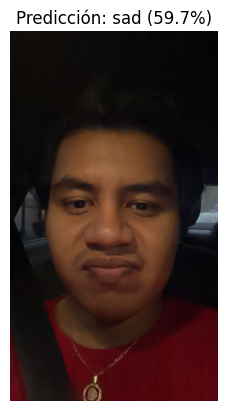


Imagen subida: AscoMaxi (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


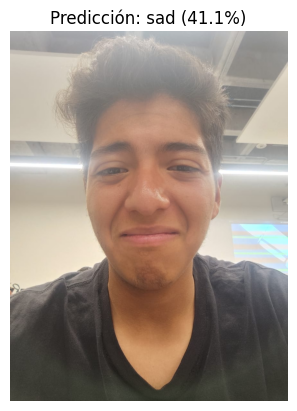


Imagen subida: EnojoMaxi (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


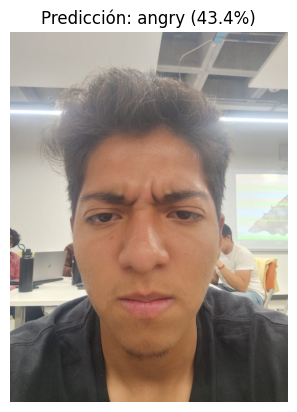


Imagen subida: FelicidadDario (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


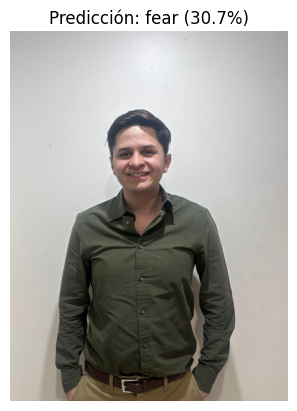


Imagen subida: FelicidadMau (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


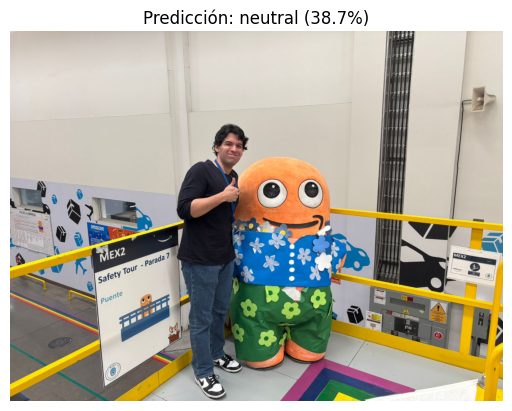


Imagen subida: FelicidadNicole (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


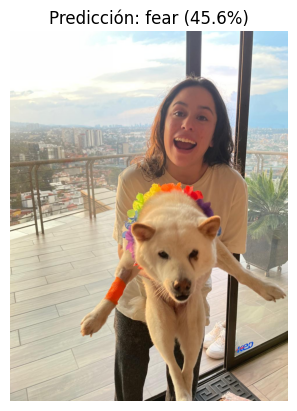


Imagen subida: FelicidadYam (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


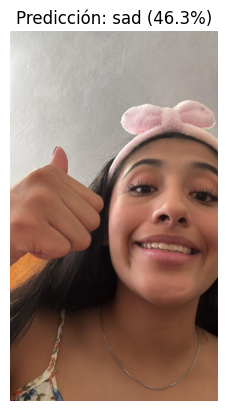


Imagen subida: MiedoGerry (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


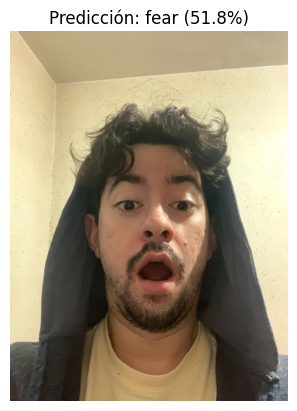


Imagen subida: NeutralGerry (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


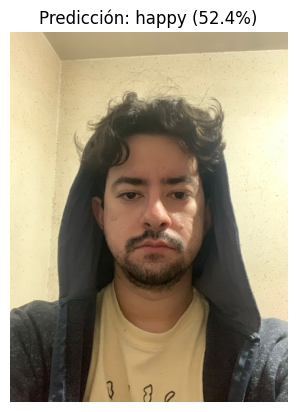


Imagen subida: SorpresaNicole (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


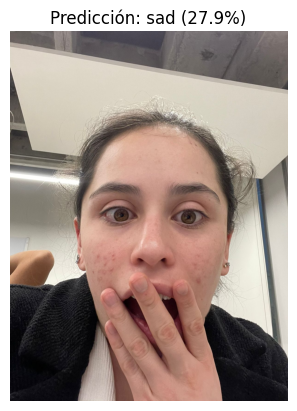


Imagen subida: TristezaNicole (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


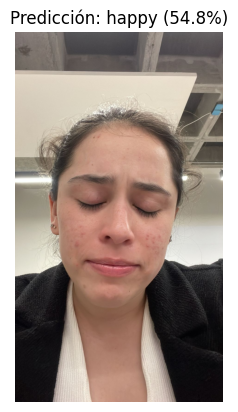


Imagen subida: TristezaYam (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


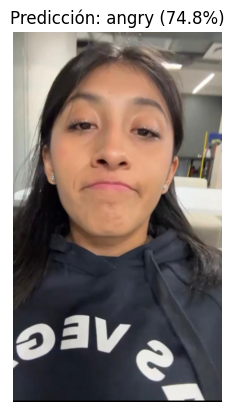

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    print(f"\nImagen subida: {img_path}")

    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (48, 48))


    img_input = img_resized / 255.0
    img_input = np.expand_dims(img_input, axis=(0, -1))

    pred = model.predict(img_input)
    clase_pred = np.argmax(pred)
    emocion = clases[clase_pred]
    confianza = np.max(pred) * 100

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicción: {emocion} ({confianza:.1f}%)")
    plt.axis('off')
    plt.show()


Logramos un accuracy de 50%, pero el modelo logró clasificar solo 2 de las fotos que subimos. Las dos fotos que logra clasificar correctamente fueron miedo y enojo. Que resulta sorprendente porque no son las clases con mayor cantidad de fotos de entrenamiento. También sorprende que no haya clasificado bien la felicidad por lo mismo. Aunque algunas fotos tenían dos sujetos, entonces no sabemos como pudo afectar eso la predicción.
